In [455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [456]:
df=pd.read_excel("loan_sanction.xlsx")

In [457]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban
3,LP001035,Male,,2,Graduate,No,2340,2546,100,360,1,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban


####  1. Check how many duplicate rows are present


In [458]:
df[df.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
5,LP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban
59,LP001321,Male,Yes,2,Graduate,No,3613,3539,134,180,1,Semiurban
330,LP002805,Male,Yes,2,Graduate,No,5041,700,150,360,1,Urban


#### 2. If any Duplicates Present, drop those duplicates


In [459]:
df.drop_duplicates(inplace=True)

In [460]:
df[df.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


#### 3. Check null values in each column


In [461]:
df.isnull().sum()

Loan_ID                0
Gender                 2
Married                0
Dependents            11
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
dtype: int64

#### 4. Delete the Rows which are having null values.


In [462]:
df.dropna()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban
3,LP001035,Male,,2,Graduate,No,2340,2546,100,360,1,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
365,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113,360,1,Urban
366,LP002975,Male,Yes,0,Graduate,No,4158,709,115,360,1,Urban
367,LP002980,Male,No,0,Graduate,No,3250,1993,126,360,1,Semiurban
368,LP002986,Male,Yes,0,Graduate,No,5000,2393,158,360,1,Rural


#### 5. Impute null values with Mode in Gender Column


In [463]:
df["Gender"].isnull().sum()

2

In [464]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)


In [465]:
df["Gender"].isnull().sum()

0

In [466]:
df["Gender"].mode()[0]

'Male'

#### 6. Impute null values with Mode in Column


In [467]:
df["Self_Employed"].isnull().sum()

0

In [468]:
mode=df["Self_Employed"].mode()[0]

In [469]:
#Some Bad Data is present
df[(df["Self_Employed"]!="No")&(df["Self_Employed"]!="Yes")]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
55,LP001312,Male,Yes,0,Not Graduate,,5293,0,92,360,1,Urban
111,LP001573,Male,Yes,0,Not Graduate,,4523,1350,165,360,1,Urban
201,LP002102,Male,Yes,0,Graduate,Don't know,1900,1442,88,360,1,Rural
304,LP002654,Female,No,NaN,Graduate,78,14987,0,177,360,1,Rural


In [470]:
df.loc[(df["Self_Employed"]!="No")&(df["Self_Employed"]!="Yes"),"Self_Employed"]=mode

In [471]:
df.loc[(df["Self_Employed"]!="No")&(df["Self_Employed"]!="Yes"),"Self_Employed"]

Series([], Name: Self_Employed, dtype: object)

#### 7. Impute null values with mean in LoanAmount Column


In [472]:
df["LoanAmount"].isnull().sum()


0

In [473]:
# but some bad data is Present
df["LoanAmount"].replace([" ","#"],df["LoanAmount"].mode()[0],inplace=True)

#### 8. Top 5 Records


In [474]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban
3,LP001035,Male,,2,Graduate,No,2340,2546,100,360,1,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban


#### 9. Export the dataframe in excel.


In [475]:
df.to_excel("laon1.xlsx")

PermissionError: [Errno 13] Permission denied: 'laon1.xlsx'

#### 10. Number of Rows and Columns in a DataFrame


In [ ]:
df.shape

#### 11. Print all Column names in a DF


In [476]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

#### 12. Generate the descriptive statistics of Numerical variables.


In [477]:
df.describe()

,Coapplicant_Income,LoanAmount,Loan_Amount_Term
count,367.000000,367.000000,367.000000
mean,1569.577657,162.768392,342.822888
std,2334.232099,518.544636,64.658402
min,0.000000,-88.000000,6.000000
25%,0.000000,102.000000,360.000000
50%,1025.000000,125.000000,360.000000
75%,2430.500000,158.000000,360.000000
max,24000.000000,9999.000000,480.000000


#### 13. Display numeric data type columns in a DF


In [478]:
[fea for fea in df.columns if df[fea].dtype=="int64"]

['Coapplicant_Income', 'LoanAmount', 'Loan_Amount_Term']

#### 14. Select all data types of columns in a DF except object data type.


In [479]:
[fea for fea in df.columns if df[fea].dtype!="object"]

['Coapplicant_Income', 'LoanAmount', 'Loan_Amount_Term']

#### 15. Extract all the Records where Self_Employed is equal to Yes.
   

In [480]:
df[df["Self_Employed"]=="Yes"]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
6,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152,360,1,Urban
38,LP001210,?,Yes,0,Graduate,Yes,2267,2792,90,360,1,Urban
39,LP001211,Male,No,0,Graduate,Yes,5833,0,116,360,1,Urban
50,LP001270,Male,Yes,3+,Not Graduate,Yes,8000,250,187,360,1,Semiurban
63,LP001335,Male,Yes,0,Graduate,Yes,7016,292,125,360,1,Urban
75,LP001380,Male,Yes,0,Graduate,Yes,3900,2094,232,360,1,Rural
79,LP001413,Male,No,0,Graduate,Yes,6356,0,50,360,1,Rural
92,LP001475,Male,Yes,0,Graduate,Yes,3188,2286,130,360,1,Rural
112,LP001584,Female,#,0,Graduate,Yes,4742,0,108,360,1,Semiurban
134,LP001728,Male,Yes,1,Graduate,Yes,3343,1517,105,360,1,Rural


#### 16. Extract all the Records where Property_area is equal to urban in a DF.


In [481]:
df[df["Property_Area"]=="Urban"]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban
3,LP001035,Male,,2,Graduate,No,2340,2546,100,360,1,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
359,LP002935,Male,Yes,1,Graduate,No,3791,1936,85,360,1,Urban
360,LP002952,Male,No,0,Graduate,No,2500,0,60,360,1,Urban
363,LP002965,Female,Yes,0,Graduate,No,8550,4255,96,360,1,Urban
365,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113,360,1,Urban


#### 17. Print number of unique vaues in Gender column
    

In [482]:
df["Gender"].value_counts().reset_index()

,Gender,count
0,Male,296
1,Female,70
2,?,1


#### 18. Check outliers in Loan amount and credit history column and replace them with mean.


In [483]:
df["LoanAmount"]=df["LoanAmount"].astype("int64")

In [484]:
Q1,Q3=np.percentile(df["LoanAmount"],[25,75])

In [485]:
# Find IQR
IQR=Q3-Q1

In [486]:
IQR

56.0

In [487]:
lower_fence=Q1-1.5*(IQR)
upper_fence=Q3+1.5*(IQR)

In [488]:
print(lower_fence)
print(upper_fence)

18.0
242.0


<Axes: >

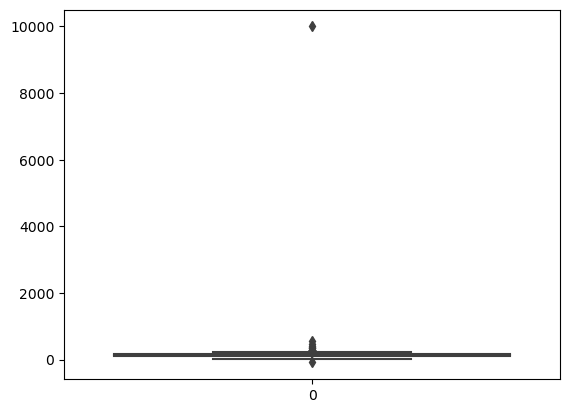

In [489]:
sns.boxplot(df["LoanAmount"])

In [491]:
df.loc[df["LoanAmount"]<lower_fence,"LoanAmount"]=df["LoanAmount"].mean()
df.loc[df["LoanAmount"]>upper_fence,"LoanAmount"]=df["LoanAmount"].mean()

<Axes: >

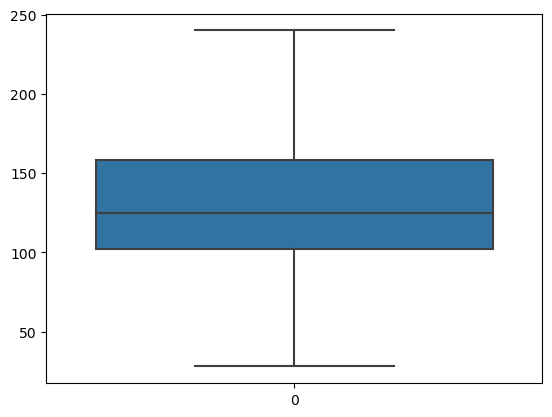

In [492]:
sns.boxplot(df["LoanAmount"])

In [493]:
# credit history 
df["Credit_History"].replace(" ",df["Credit_History"].mode()[0],inplace=True)

In [494]:
#convert datatype
df["Credit_History"]=df["Credit_History"].astype("int64")

<Axes: >

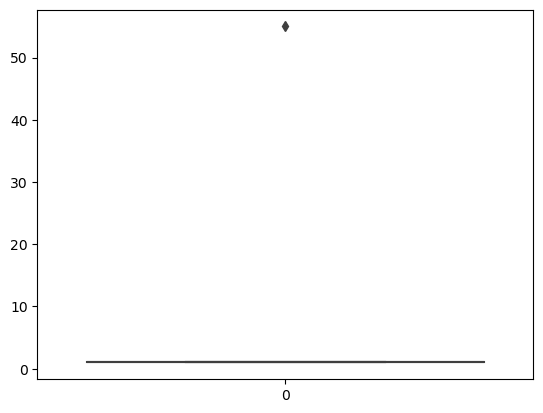

In [495]:
sns.boxplot(df["Credit_History"])

In [496]:
Q1,Q3=np.percentile(df["Credit_History"],[25,75])

In [498]:
print(Q1,Q3)

1.0 1.0


In [499]:
# find IQR
IQR=Q3-Q1
print(IQR)

0.0


In [500]:
lower_fence=Q1-1.5*(IQR)
upper_fence=Q3+1.5*(IQR)

In [501]:
df.loc[df["Credit_History"]<lower_fence,"Credit_History"]=df["Credit_History"].median()
df.loc[df["Credit_History"]>upper_fence,"Credit_History"]=df["Credit_History"].median()

<Axes: >

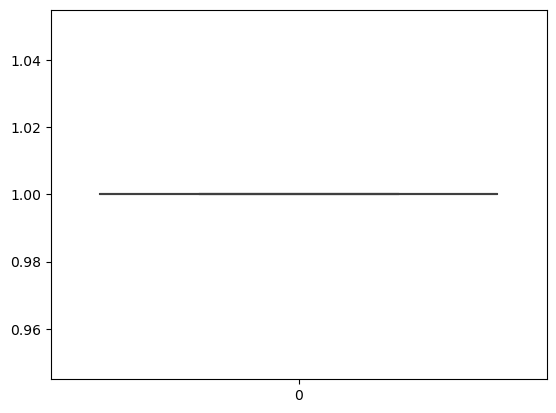

In [502]:
sns.boxplot(df["Credit_History"])

#### 19. Check for correlations of all variables.

<Axes: >

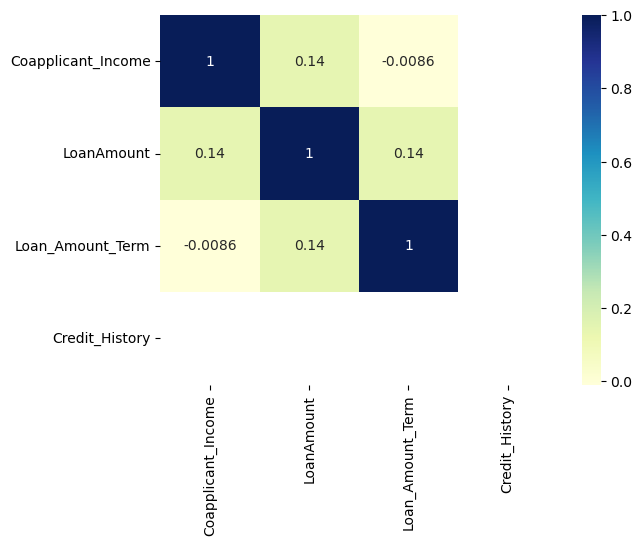

In [505]:

sns.heatmap(df[[fea for fea in df.columns if df[fea].dtype!="object"]].corr(),cmap="YlGnBu",annot=True)